In [235]:
#using numerically encoded data 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix 

from sklearn import tree
from sklearn import preprocessing

In [197]:
X = pd.read_pickle("X_train_encoded.pickle")
y = pd.read_pickle("y_train_encoded.pickle")

cols = [c for c in X.columns if c.split('_')[-1] != 'code']

lst = ['gps_height', 'longitude', 'latitude', 'population']
for i in lst:
    cols.remove(i)
    
X = X.drop(columns = cols)

y = y['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y)



In [198]:
NB = GaussianNB()

In [199]:
NB.fit(X_train, y_train)

GaussianNB()

In [200]:
NB.score(X_train, y_train)

0.6031964563629834

In [201]:
NB.score(X_test, y_test)

0.6024420901418567

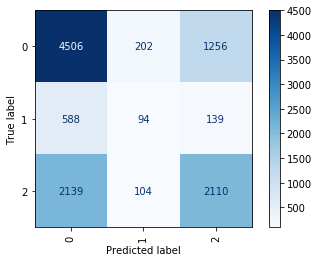

In [202]:
plot_confusion_matrix(NB, X_test, y_test, cmap = "Blues", xticks_rotation  = "vertical")

In [203]:
dt = DecisionTreeClassifier()

dt_model = dt.fit(X_train, y_train)
dt_model.score(X_test, y_test)

0.7283174717184414

In [204]:
forest1 = RandomForestClassifier(random_state = 47)
forest1.fit(X_train, y_train)
forest1.score(X_test, y_test)

0.7973603878613754

In [205]:
from sklearn.model_selection import GridSearchCV

In [113]:
params = {
    'random_state': 47,
    'criterion' : ["gini", "entropy"],
    'max_depth' : [3, 5, 10],
    'min_samples_split' : [2, 50],
    'min_samples_leaf' : [20, 50],
    'max_features' : [5, 10],
    'bootstrap' : [True],
}

gs = GridSearchCV(forest, params)

In [115]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'max_depth': [10, 15], 'max_features': [10, 15],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5], 'random_state': [47]})

In [108]:
gs.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'random_state': 47}

In [ ]:
params2 = {
    'bootstrap' : [True],
    'random_state': [47],
    'criterion' : ["gini"],
    
    'max_depth' : [10, 15],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [10, 20],
    'max_features' : [10, 15],
}

gs2 = GridSearchCV(forest, params)

In [116]:
gs2.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'random_state': 47}

In [122]:
forest2 = RandomForestClassifier(bootstrap = True, criterion = 'gini', max_features = 10, max_depth = 10, min_samples_leaf = 20, min_samples_split = 3, random_state = 47)
forest2.fit(X_train, y_train)
forest2.score(X_test, y_test)

0.7504938049919195

In [123]:
forest3 = RandomForestClassifier(bootstrap = True, criterion = 'gini', random_state = 47, max_depth = 15, min_samples_leaf = 10, min_samples_split = 2)
forest3.fit(X_train, y_train)
forest3.score(X_test, y_test)

0.7790447117974502

In [134]:
y_test_pred = forest3.predict(X_test)

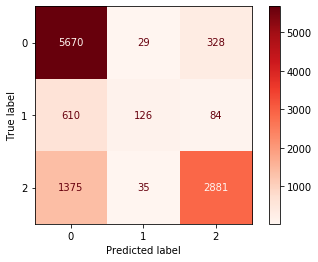

In [136]:
plot_confusion_matrix(forest3, X_test, y_test, cmap = "Reds")

In [138]:
from sklearn.pipeline import Pipeline

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
X_train

,gps_height,longitude,latitude,region_code,district_code,population,installer_code,wpt_name_code,basin_code,subvillage_code,...,management_code,management_group_code,payment_code,water_quality_code,quality_group_code,quantity_code,source_code,source_type_code,source_class_code,waterpoint_type_code
56561,328,36.419088,-8.654572e+00,11,4,75,349,3399,6,7782,...,11,4,3,6,2,1,6,4,1,1
25280,1616,29.757376,-4.621457e+00,5,3,200,267,25284,3,6730,...,7,4,6,6,2,1,8,6,0,5
58423,1347,37.618954,-3.200634e+00,6,1,1,380,8162,5,5598,...,0,0,3,6,2,1,8,6,0,1
12371,0,32.173748,-3.422392e+00,17,5,0,1791,4144,3,4296,...,7,4,6,6,2,1,7,5,0,4
43509,100,39.017876,-4.999318e+00,20,4,80,349,10086,5,1850,...,7,4,0,6,2,0,7,5,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36379,359,37.639347,-6.114479e+00,11,6,56,908,10005,8,5264,...,7,4,0,6,2,1,3,0,0,1
41813,1356,38.481168,-4.940758e+00,20,1,1,349,15520,5,6529,...,7,4,0,6,2,1,8,6,0,1
22309,972,36.820454,-3.487677e+00,0,2,150,349,21456,5,8416,...,7,4,4,6,2,2,8,6,0,1
48847,0,31.735203,-1.363899e+00,4,2,0,736,27053,4,4133,...,7,4,0,6,2,2,5,3,1,1


In [144]:
KNN = KNeighborsClassifier(weights = 'distance', n_neighbors = 3)

In [153]:
X_train_knn = X_train[['latitude', 'longitude', 'gps_height', 'basin_code', 'district_code', 'management_code']]
X_test_knn = X_test[['latitude', 'longitude', 'gps_height', 'basin_code', 'district_code', 'management_code']]

In [154]:
KNN.fit(X_train_knn, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [155]:
KNN.score(X_test_knn, y_test)

0.5953492548033759

In [157]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer


In [159]:
ss = StandardScaler()

X_train_scales = ss.fit_transform(X_train)
X_test_scales = ss.transform(X_test)

In [161]:
forest3.fit(X_train_scales, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=10, random_state=47)

In [163]:
forest3.score(X_test_scales, y_test)

0.7791344945232537

In [173]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


In [233]:
pipe1 = make_pipeline(
    RandomForestClassifier(bootstrap = True, criterion = 'gini', random_state = 47, max_depth = 30, min_samples_leaf = 15, min_samples_split = 2)
)

pipe1.fit(X_train, y_train)
pipe1.score(X_test, y_test)

0.7744657927814689

In [181]:
from sklearn.metrics import classification_report

In [183]:
y_test_pred = forest3.predict(X_test)

In [207]:
print(classification_report(y_test, y_test_pred, target_names = ['functional', 'functional needs repair', 'non functional']))

                         precision    recall  f1-score   support

             functional       0.54      0.17      0.26      5964
functional needs repair       0.00      0.00      0.00       821
         non functional       0.39      0.83      0.53      4353

               accuracy                           0.42     11138
              macro avg       0.31      0.33      0.27     11138
           weighted avg       0.44      0.42      0.35     11138



In [194]:
y.value_counts()

0    24237
2    17102
1     3211
Name: status_group, dtype: int64